In [4]:
!pip install wordcloud


In [56]:
# Import Libraries
# Importing Numpy & Pandas for data processing
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import model selection libraries
from sklearn.model_selection import train_test_split

# Library used for ML Model implementation
from sklearn.naive_bayes import MultinomialNB

# Importing the Pipeline class from scikit-learn
from sklearn.pipeline import Pipeline

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [58]:
# Define column names
column_names = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
    'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
    'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
    'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
    'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
    'word_freq_edu', 'word_freq_table', 'word_freq_conference',
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#',
    'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total',
    'spam'
]

# Load data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
df = pd.read_csv(url, header=None, names=column_names)

# Display sample
df.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  4601
Number of columns are:  58


In [7]:
# Dataset Info
# Checking information about the dataset using info
df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [9]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 391


In [11]:
# Missing Values/Null Values Count
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [13]:
# Dataset Columns
df.columns
     

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [15]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,...,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00
mean,0.10,0.21,0.28,0.07,0.31,0.10,0.11,0.11,0.09,0.24,...,0.04,0.14,0.02,0.27,0.08,0.04,5.19,52.17,283.29,0.39
std,0.31,1.29,0.50,1.40,0.67,0.27,0.39,0.40,0.28,0.64,...,0.24,0.27,0.11,0.82,0.25,0.43,31.73,194.89,606.35,0.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.59,6.00,35.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.06,0.00,0.00,0.00,0.00,2.28,15.00,95.00,0.00
75%,0.00,0.00,0.42,0.00,0.38,0.00,0.00,0.00,0.00,0.16,...,0.00,0.19,0.00,0.32,0.05,0.00,3.71,43.00,266.00,1.00
max,4.54,14.28,5.10,42.81,10.00,5.88,7.27,11.11,5.26,18.18,...,4.38,9.75,4.08,32.48,6.00,19.83,1102.50,9989.00,15841.00,1.00


In [17]:
# Check Unique Values for each variable using a for loop.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in word_freq_make is 142
No. of unique values in word_freq_address is 171
No. of unique values in word_freq_all is 214
No. of unique values in word_freq_3d is 43
No. of unique values in word_freq_our is 255
No. of unique values in word_freq_over is 141
No. of unique values in word_freq_remove is 173
No. of unique values in word_freq_internet is 170
No. of unique values in word_freq_order is 144
No. of unique values in word_freq_mail is 245
No. of unique values in word_freq_receive is 113
No. of unique values in word_freq_will is 316
No. of unique values in word_freq_people is 158
No. of unique values in word_freq_report is 133
No. of unique values in word_freq_addresses is 118
No. of unique values in word_freq_free is 253
No. of unique values in word_freq_business is 197
No. of unique values in word_freq_email is 229
No. of unique values in word_freq_you is 575
No. of unique values in word_freq_credit is 148
No. of unique values in word_freq_your is 401
No. of uniq

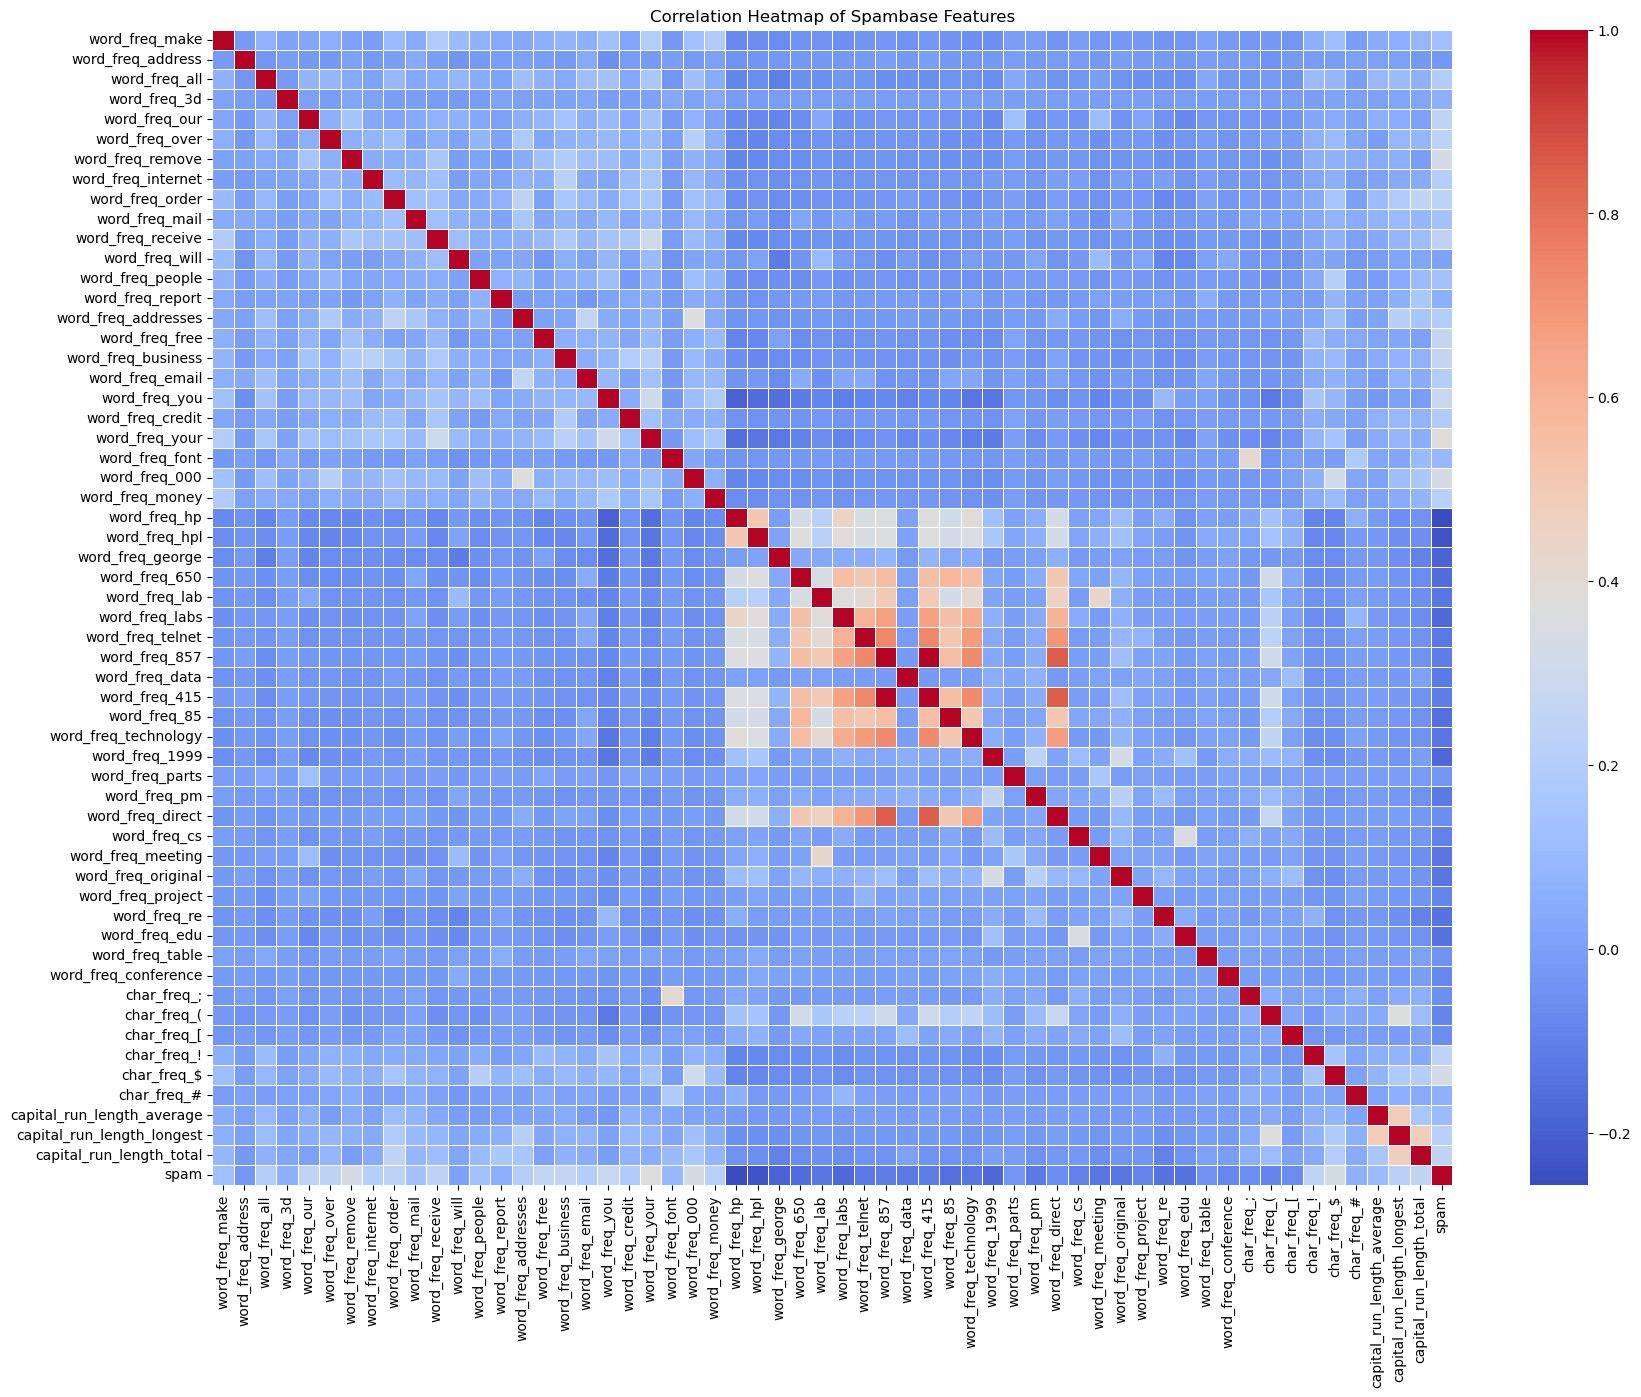

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Spambase Features")
plt.show()


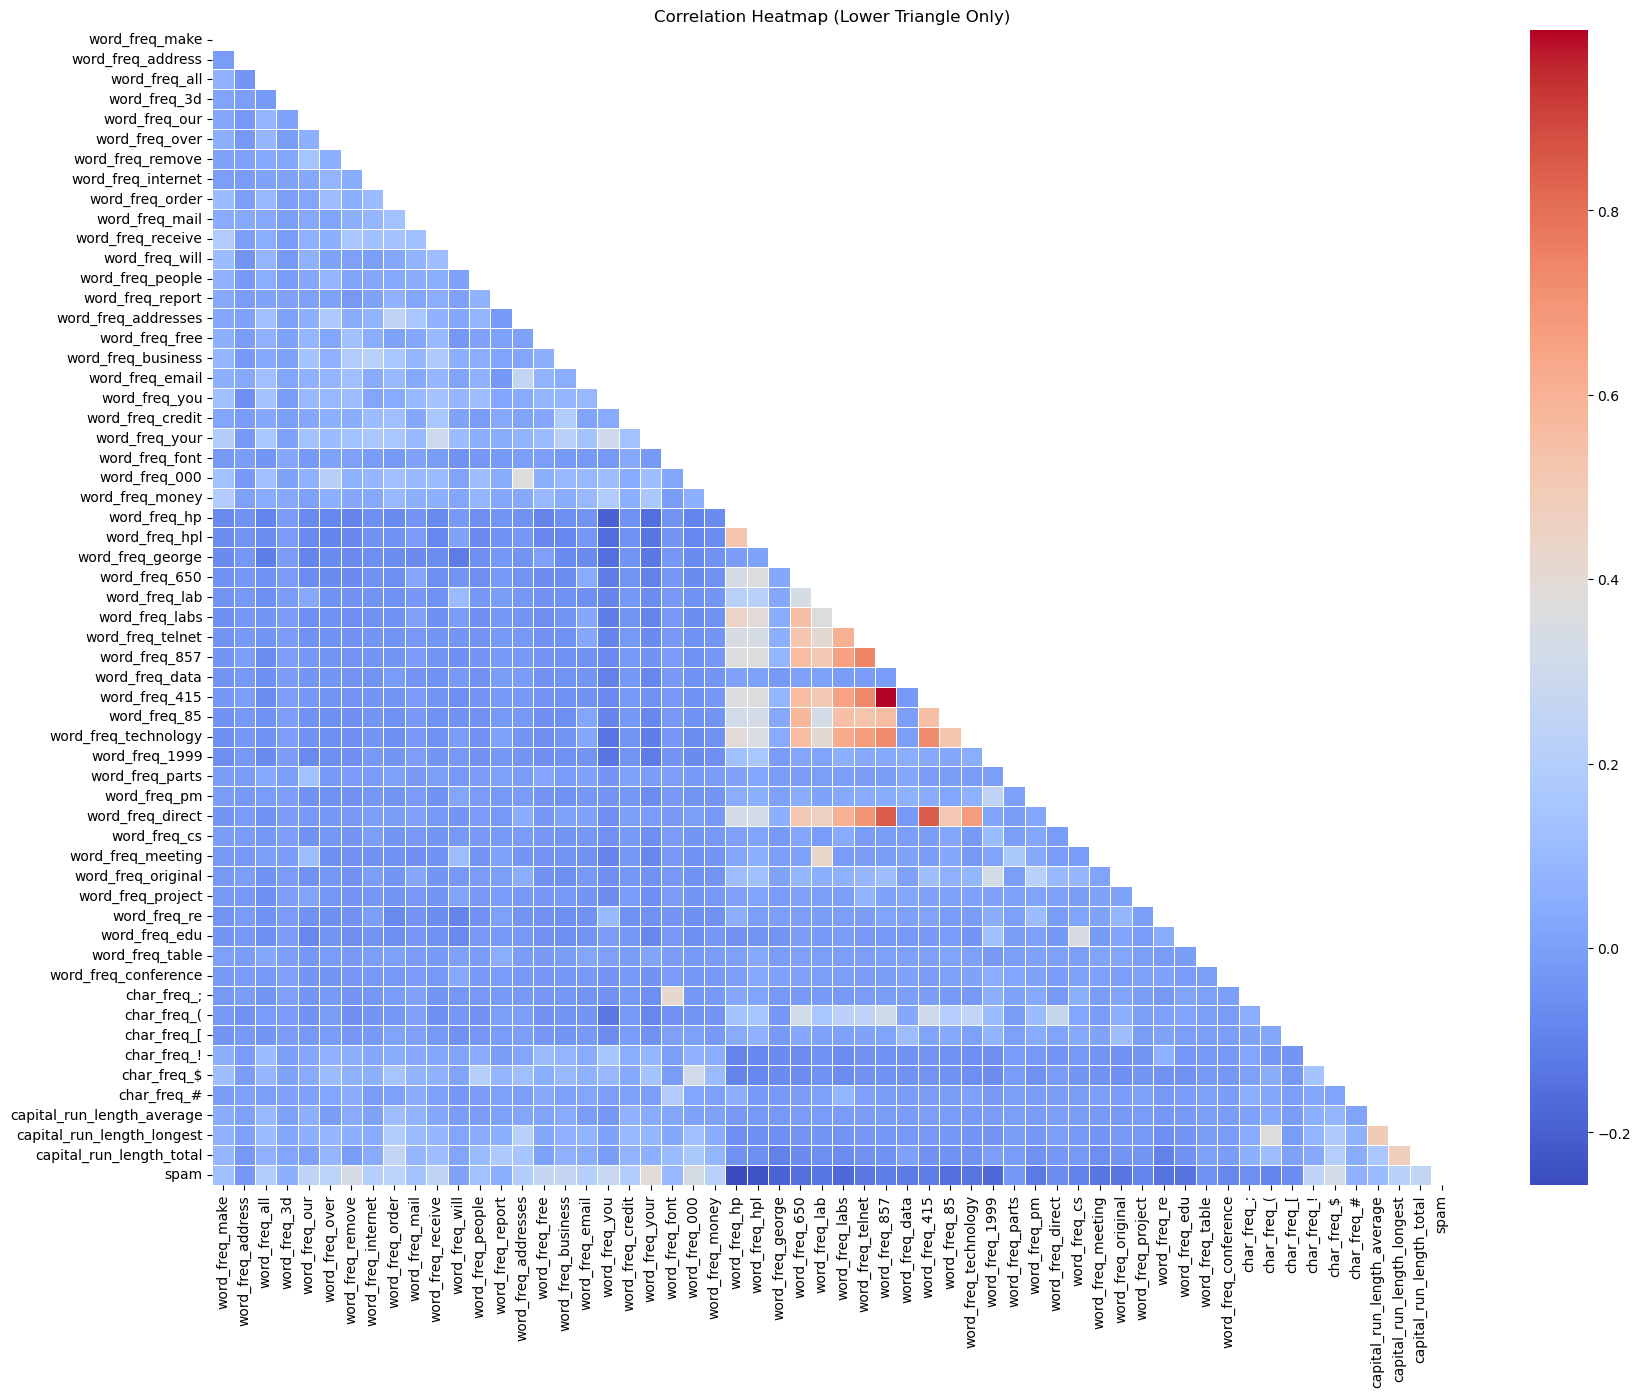

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))  # mask upper triangle (including diagonal)

plt.figure(figsize=(20, 15))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap (Lower Triangle Only)")
plt.show()


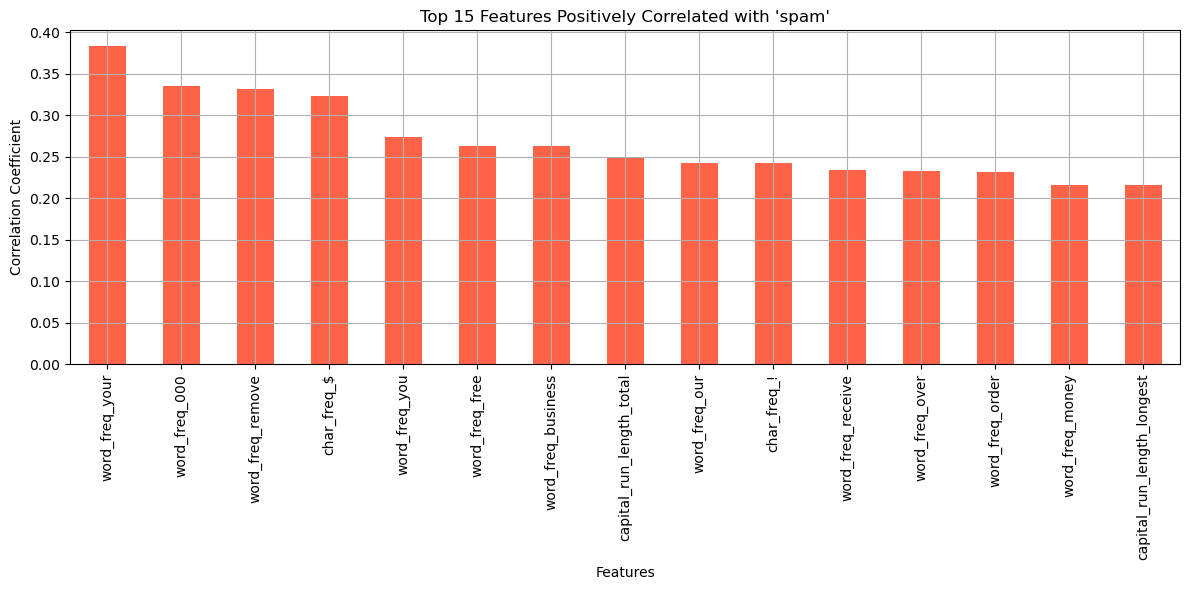

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df.corr()

# Extract correlation of all features with 'spam'
spam_corr = correlation_matrix['spam'].drop('spam').sort_values(ascending=False)

# Plotting the top 15 features most positively correlated with spam
plt.figure(figsize=(12, 6))
spam_corr.head(15).plot(kind='bar', color='tomato')
plt.title("Top 15 Features Positively Correlated with 'spam'")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
!pip install xgboost



In [27]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd


In [29]:
# Features and labels
X = df.drop('spam', axis=1)
y = df['spam']


In [31]:
X.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_').replace('>', '_') for col in X.columns]

In [33]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
cv_scores = cross_val_score(xgb_base, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))



Cross-validation scores: [0.95652174 0.93478261 0.94836957 0.95788043 0.95108696]
Mean CV accuracy: 0.9497282608695652


In [37]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.3],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validation Score: 0.9478282951162732


In [62]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))



Test Accuracy: 0.9587404994571118


<Figure size 600x400 with 0 Axes>

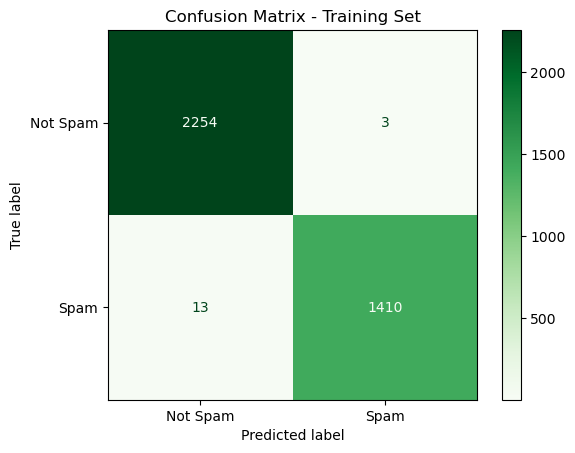

Classification Report (Train Set):

              precision    recall  f1-score   support

    Not Spam       0.99      1.00      1.00      2257
        Spam       1.00      0.99      0.99      1423

    accuracy                           1.00      3680
   macro avg       1.00      0.99      1.00      3680
weighted avg       1.00      1.00      1.00      3680



<Figure size 600x400 with 0 Axes>

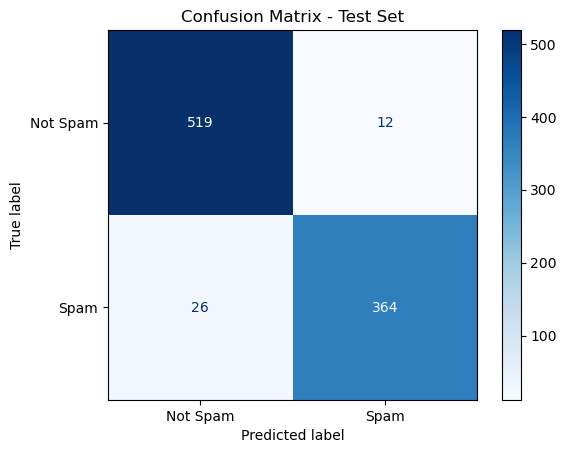

Classification Report (Test Set):

              precision    recall  f1-score   support

    Not Spam       0.95      0.98      0.96       531
        Spam       0.97      0.93      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.96      0.96       921
weighted avg       0.96      0.96      0.96       921



In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# ==== Train Set ====
y_train_pred = best_model.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(6, 4))
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=["Not Spam", "Spam"])
disp_train.plot(cmap='Greens', values_format='d')
plt.title("Confusion Matrix - Training Set")
plt.grid(False)
plt.show()

print("Classification Report (Train Set):\n")
print(classification_report(y_train, y_train_pred, target_names=["Not Spam", "Spam"]))

# ==== Test Set ====
y_test_pred = best_model.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 4))
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["Not Spam", "Spam"])
disp_test.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Test Set")
plt.grid(False)
plt.show()

print("Classification Report (Test Set):\n")
print(classification_report(y_test, y_test_pred, target_names=["Not Spam", "Spam"]))


In [68]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Generate classification reports with numeric labels as keys
train_report = classification_report(y_train, y_train_pred, output_dict=True)
test_report = classification_report(y_test, y_test_pred, output_dict=True)

# Create summary table using class labels: 0 (Not Spam), 1 (Spam)
summary_data = {
    'Metric': ['Accuracy',
               'Precision (Not Spam)', 'Recall (Not Spam)', 'F1-score (Not Spam)',
               'Precision (Spam)', 'Recall (Spam)', 'F1-score (Spam)'],
    'Train Set': [
        accuracy_score(y_train, y_train_pred),
        train_report['0']['precision'],
        train_report['0']['recall'],
        train_report['0']['f1-score'],
        train_report['1']['precision'],
        train_report['1']['recall'],
        train_report['1']['f1-score']
    ],
    'Test Set': [
        accuracy_score(y_test, y_test_pred),
        test_report['0']['precision'],
        test_report['0']['recall'],
        test_report['0']['f1-score'],
        test_report['1']['precision'],
        test_report['1']['recall'],
        test_report['1']['f1-score']
    ]
}

# Create and format the summary DataFrame
summary_df = pd.DataFrame(summary_data)
summary_df[['Train Set', 'Test Set']] = summary_df[['Train Set', 'Test Set']].round(2)

# Display
summary_df



,Metric,Train Set,Test Set
0,Accuracy,1.00,0.96
1,Precision (Not Spam),0.99,0.95
2,Recall (Not Spam),1.00,0.98
3,F1-score (Not Spam),1.00,0.96
4,Precision (Spam),1.00,0.97
5,Recall (Spam),0.99,0.93
6,F1-score (Spam),0.99,0.95


In [51]:
# Example: Randomized dummy feature vector (replace with real processed values)
custom_email_vector = np.array([0.0]*57).reshape(1, -1)
# You could tweak some features to simulate spam indicators:
custom_email_vector[0][15] = 1.5  # word_freq_free
custom_email_vector[0][52] = 3.0  # char_freq_$
custom_email_vector[0][54] = 10.0 # capital_run_length_average

# Predict
prediction = best_model.predict(custom_email_vector)
print("Prediction:", "Spam" if prediction[0] == 1 else "Not Spam")


Prediction: Not Spam


In [53]:
# Create a baseline (zero vector for all 57 features)
custom_email_vector = np.array([0.0] * 57).reshape(1, -1)

# Modify multiple features that are strong spam indicators
custom_email_vector[0][15] = 5.0   # word_freq_free
custom_email_vector[0][16] = 3.5   # word_freq_business
custom_email_vector[0][17] = 2.0   # word_freq_email
custom_email_vector[0][18] = 4.0   # word_freq_you
custom_email_vector[0][20] = 3.0   # word_freq_your
custom_email_vector[0][23] = 4.5   # word_freq_money
custom_email_vector[0][52] = 5.0   # char_freq_$
custom_email_vector[0][54] = 15.0  # capital_run_length_average
custom_email_vector[0][55] = 50.0  # capital_run_length_longest
custom_email_vector[0][56] = 300.0 # capital_run_length_total

# Predict again
prediction = best_model.predict(custom_email_vector)
print("Prediction:", "Spam" if prediction[0] == 1 else "Not Spam")


Prediction: Spam
